In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

In [3]:
from sklearn.svm import SVC

Cs = [0.001,0.01,0.1,1,10]
gammas = [0.001,0.01,0.1,1]

In [4]:
from sklearn.grid_search import GridSearchCV

param_grid = {'C': Cs, 'gamma':gammas}

In [6]:
grid_search = GridSearchCV(SVC(), param_grid, verbose=3, cv=5)

In [7]:
grid_search.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] gamma=0.001, C=0.001 ............................................
[CV] ................... gamma=0.001, C=0.001, score=0.866667 -   0.0s
[CV] gamma=0.001, C=0.001 ............................................
[CV] ................... gamma=0.001, C=0.001, score=0.966667 -   0.0s
[CV] gamma=0.001, C=0.001 ............................................
[CV] ................... gamma=0.001, C=0.001, score=0.833333 -   0.0s
[CV] gamma=0.001, C=0.001 ............................................
[CV] ................... gamma=0.001, C=0.001, score=0.966667 -   0.0s
[CV] gamma=0.001, C=0.001 ............................................
[CV] ................... gamma=0.001, C=0.001, score=0.933333 -   0.0s
[CV] gamma=0.01, C=0.001 .............................................
[CV] .................... gamma=0.01, C=0.001, score=0.866667 -   0.0s
[CV] gamma=0.01, C=0.001 .............................................
[CV] ..........

[Parallel(n_jobs=1)]: Done  31 tasks       | elapsed:    0.3s


[CV] ...................... gamma=0.1, C=0.01, score=0.933333 -   0.0s
[CV] gamma=0.1, C=0.01 ...............................................
[CV] ...................... gamma=0.1, C=0.01, score=0.866667 -   0.0s
[CV] gamma=0.1, C=0.01 ...............................................
[CV] ...................... gamma=0.1, C=0.01, score=0.933333 -   0.0s
[CV] gamma=0.1, C=0.01 ...............................................
[CV] ...................... gamma=0.1, C=0.01, score=0.933333 -   0.0s
[CV] gamma=1, C=0.01 .................................................
[CV] ........................ gamma=1, C=0.01, score=0.933333 -   0.0s
[CV] gamma=1, C=0.01 .................................................
[CV] ........................ gamma=1, C=0.01, score=0.966667 -   0.0s
[CV] gamma=1, C=0.01 .................................................
[CV] ........................ gamma=1, C=0.01, score=0.966667 -   0.0s
[CV] gamma=1, C=0.01 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'gamma': [0.001, 0.01, 0.1, 1], 'C': [0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=3)

In [8]:
grid_search.best_params_

{'C': 1, 'gamma': 0.1}

In [9]:
grid_search.best_score_

0.97999999999999998

([<matplotlib.axis.XTick at 0x1e80cf9e940>,
 <a list of 5 Text xticklabel objects>)

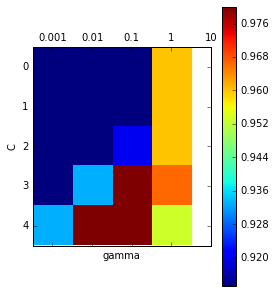

In [10]:
#extract just the scores

scores = [x[1] for x in grid_search.grid_scores_]
scores = np.array(scores).reshape(5,4)

plt.matshow(scores)
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(4), param_grid['gamma'])
plt.xticks(np.arange(5), param_grid['C'])

In [12]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [13]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'gamma': [0.001, 0.01, 0.1, 1], 'C': [0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [15]:
grid_search.score(X_test, y_test)

0.89473684210526316

## Nested Cross-Validation

In [18]:
from sklearn.cross_validation import cross_val_score
cross_val_score(grid_search, X, y, cv=5)

array([ 0.96666667,  1.        ,  0.96666667,  0.96666667,  1.        ])